In [6]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [7]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Turning Your Model into an Online Application

### Using the Model for Inference

In [8]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [10]:
learn_inf.predict('../images/grizzly.jpg')

('grizzly', tensor(1), tensor([4.4101e-06, 9.9999e-01, 1.7513e-06]))

In [11]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Creating a Notebook App from the Model

In [12]:
btn_upload = widgets.FileUpload()
#btn_upload

FileUpload(value={}, description='Upload')

In [28]:
#hide
# For the book, we can't actually click an upload button, so we fake it
#btn_upload = SimpleNamespace(data = ['../images/grizzly.jpg'])

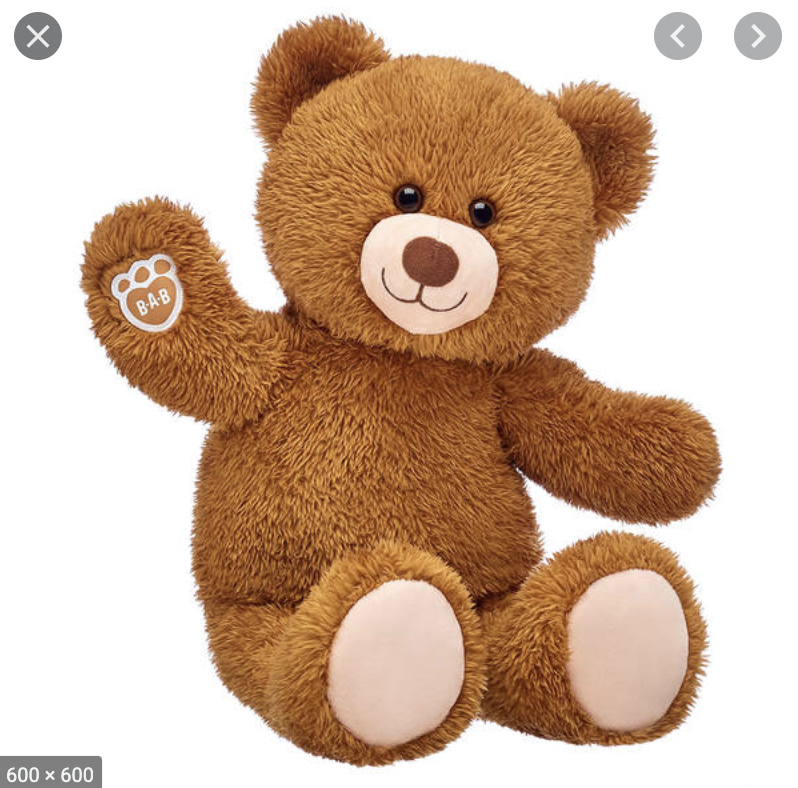

In [13]:
#hide
btn_upload?
img = PILImage.create(btn_upload.data[-1])
#img

In [14]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
#out_pl

Output()

In [15]:
lbl_n1=widgets.Label()
lbl_n1.value='Please choose an image'
#lbl_n1

Label(value='Please choose an image')

In [16]:
pred,pred_idx,probs = learn_inf.predict(img)

In [17]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
#lbl_pred

Label(value='Prediction: teddy; Probability: 0.9999')

In [18]:
btn_run = widgets.Button(description='Classify')
#btn_run

Button(description='Classify', style=ButtonStyle())

In [19]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [20]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [23]:
#VBox?

In [21]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [24]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.6 MB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.8 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.10 OK
